#Finding Arithmetic Circuts

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Setup

In [ ]:
#@title Colab Setup Environment

try:
    import google.colab
    !mkdir -p repository && cd repository && \
     git clone https://github.com/ran-levinstein/circuit-tracer && \
     curl -LsSf https://astral.sh/uv/install.sh | sh && \
     uv pip install -e circuit-tracer/

    import sys
    from huggingface_hub import notebook_login
    sys.path.append('repository/circuit-tracer')
    sys.path.append('repository/circuit-tracer/demos')
    notebook_login(new_session=False)
    IN_COLAB = True
except ImportError:
    IN_COLAB = False

Cloning into 'circuit-tracer'...
remote: Enumerating objects: 155, done.
remote: Counting objects: 100% (60/60), done.
remote: Compressing objects: 100% (53/53), done.
remote: Total 155 (delta 25), reused 7 (delta 7), pack-reused 95 (from 1)
Receiving objects: 100% (155/155), 2.13 MiB | 13.89 MiB/s, done.
Resolving deltas: 100% (40/40), done.
downloading uv 0.8.14 x86_64-unknown-linux-gnu
no checksums to verify
installing to /usr/local/bin
  uv
  uvx
everything's installed!
Using Python 3.12.11 environment at: /usr
Resolved 90 packages in 617ms
Prepared 1 package in 481ms
Installed 1 package in 1ms
 + circuit-tracer==0.1.0 (from file:///content/repository/circuit-tracer)


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


In [ ]:
!pip install transformer-lens==2.15.4

In [ ]:
from typing import Union, List
from collections import namedtuple
from pathlib import Path

import torch

#from circuit_tracer.replacement_model import ReplacementModel
from utils import display_generations_comparison, extract_supernode_features

from circuit_tracer import ReplacementModel, attribute
from circuit_tracer.utils import create_graph_files
from utils import display_topk_token_predictions, display_generations_comparison, get_topk

#Loading Model

In [ ]:
model = ReplacementModel.from_pretrained("google/gemma-2-2b-it", "gemma", dtype=torch.bfloat16)

Fetching 26 files:   0%|          | 0/26 [00:00<?, ?it/s]

layer_5/width_16k/average_l0_87/params.n(…):   0%|          | 0.00/302M [00:00<?, ?B/s]

layer_6/width_16k/average_l0_95/params.n(…):   0%|          | 0.00/302M [00:00<?, ?B/s]

layer_4/width_16k/average_l0_88/params.n(…):   0%|          | 0.00/302M [00:00<?, ?B/s]

layer_2/width_16k/average_l0_49/params.n(…):   0%|          | 0.00/302M [00:00<?, ?B/s]

layer_1/width_16k/average_l0_65/params.n(…):   0%|          | 0.00/302M [00:00<?, ?B/s]

layer_0/width_16k/average_l0_76/params.n(…):   0%|          | 0.00/302M [00:00<?, ?B/s]

layer_7/width_16k/average_l0_70/params.n(…):   0%|          | 0.00/302M [00:00<?, ?B/s]

layer_3/width_16k/average_l0_54/params.n(…):   0%|          | 0.00/302M [00:00<?, ?B/s]

layer_8/width_16k/average_l0_52/params.n(…):   0%|          | 0.00/302M [00:00<?, ?B/s]

layer_9/width_16k/average_l0_72/params.n(…):   0%|          | 0.00/302M [00:00<?, ?B/s]

layer_10/width_16k/average_l0_88/params.(…):   0%|          | 0.00/302M [00:00<?, ?B/s]

layer_11/width_16k/average_l0_5/params.n(…):   0%|          | 0.00/302M [00:00<?, ?B/s]

layer_12/width_16k/average_l0_6/params.n(…):   0%|          | 0.00/302M [00:00<?, ?B/s]

layer_13/width_16k/average_l0_8/params.n(…):   0%|          | 0.00/302M [00:00<?, ?B/s]

layer_14/width_16k/average_l0_8/params.n(…):   0%|          | 0.00/302M [00:00<?, ?B/s]

layer_15/width_16k/average_l0_8/params.n(…):   0%|          | 0.00/302M [00:00<?, ?B/s]

layer_16/width_16k/average_l0_10/params.(…):   0%|          | 0.00/302M [00:00<?, ?B/s]

layer_17/width_16k/average_l0_12/params.(…):   0%|          | 0.00/302M [00:00<?, ?B/s]

layer_18/width_16k/average_l0_13/params.(…):   0%|          | 0.00/302M [00:00<?, ?B/s]

layer_19/width_16k/average_l0_12/params.(…):   0%|          | 0.00/302M [00:00<?, ?B/s]

layer_20/width_16k/average_l0_11/params.(…):   0%|          | 0.00/302M [00:00<?, ?B/s]

layer_21/width_16k/average_l0_13/params.(…):   0%|          | 0.00/302M [00:00<?, ?B/s]

layer_22/width_16k/average_l0_15/params.(…):   0%|          | 0.00/302M [00:00<?, ?B/s]

layer_23/width_16k/average_l0_25/params.(…):   0%|          | 0.00/302M [00:00<?, ?B/s]

layer_24/width_16k/average_l0_37/params.(…):   0%|          | 0.00/302M [00:00<?, ?B/s]

layer_25/width_16k/average_l0_41/params.(…):   0%|          | 0.00/302M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/838 [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/24.2k [00:00<?, ?B/s]

Fetching 2 files:   0%|          | 0/2 [00:00<?, ?it/s]

model-00001-of-00002.safetensors:   0%|          | 0.00/4.99G [00:00<?, ?B/s]

model-00002-of-00002.safetensors:   0%|          | 0.00/241M [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/187 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/47.0k [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/4.24M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/17.5M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/636 [00:00<?, ?B/s]

Loaded pretrained model google/gemma-2-2b-it into HookedTransformer


# Part 1: Find  Arithmetic Circuits (Without chain of thought)



## Part: 1.a - collect features by using attribution graphs.

In this part we will:
- generate a bank of prompts
- for each prompt we will create an attribution graph. each grpah contains a graph where the nodes in the graph are features from the strcuture of: (layer, index, position).  we will not look at the positional info. instead for each graoh we will look at the set of features of (layer,index)
- We will order all the features by the amount of graohs they appear in, and will take the top 90 percent (this is allmost the same as taking the intesrrectin, we can see the that becuase the disrtbution of the number of tfeatures that appear in X graphs is a opppiste bell, meaning there are alot of features that appear in all graphs.





### generate a bank of prompts

In [ ]:
IS_COT = False

In [ ]:
Feature = namedtuple('Feature', ['layer', 'pos', 'feature_idx'])

def chattify(inputs:Union[str, List[str]], generate:bool=False):
    if isinstance(inputs, str):
        inputs = [inputs]
    input_list = []
    for i, s in enumerate(inputs):
        role = 'user' if i % 2 == 0 else 'assistant'
        input_list.append({'role': role, 'content':s})
    chattified = model.tokenizer.apply_chat_template(input_list, tokenize=False, add_generation_prompt=role!='assistant')
    if role == 'assistant':
        chattified = chattified[:-14]
    if not generate:
        # remove bos
        chattified =  chattified[5:]
    return chattified

In [ ]:
import re

def check_prompt(prompt, cot_prompt, result):
  """
  check if the model answers correcltly for cot and not cot. for cot is returns the offset index of the final result
  """
  text_res = model.generate(prompt, do_sample=False, use_past_kv_cache=False, verbose=False, max_new_tokens=300)
  try:
    if int(text_res[text_res.index("\nmodel\n") +  len("\nmodel\n") :])  != result:
      return False, ""
  except:
    return False, ""

  text_res_cot = model.generate(chattify(cot_prompt), do_sample=False, use_past_kv_cache=False, verbose=False, max_new_tokens=160)
  try:
    offset_index = text_res_cot.rfind(str(result))
  except:
    return False, ""
  if offset_index == -1:
    return False, ""
  return True, chattify(text_res_cot[:offset_index])

In [ ]:
import random
def generate_addition_prompts(count, seed = 22):
    random.seed(seed)
    results = []
    cot_prompts = []
    while(len(results) != count):
      result = random.randint(101, 197)
      max_num1 = result - 10
      num1 = random.randint(10, min(99, max_num1))
      num2 = result - num1
      prompt = chattify(f"ANSWER ONLY WITH THE RESULT, NO SPACES. {num1:02d}+{num2:02d}=")
      cot_prompt = f"provide a step-by-step calculation where each digit is added separately including any necessary carrying {num1:02d}+{num2:02d}="
      check, new_cot_prompt = check_prompt(prompt, cot_prompt, result)
      if check:
        results.append((prompt, result))
        cot_prompts.append((new_cot_prompt, result))
    return results, cot_prompts


### Collect Attribution Graph Features for all prompts

In [ ]:
from collections import Counter
import torch
import numpy as np

In [ ]:
def active_features_to_dict(tensor):
    """Convert a Nx3 tensor to a dict with tuple keys"""
    return {tuple(row.tolist()): True for row in tensor}

In [ ]:
import gc

# generate graphs for all  promts and count features
def get_feature_counts(prompts_and_results, model, max_n_logits,
                       desired_logit_prob, batch_size, max_feature_nodes):
  # Store graphs and their feature sets
  #feature_sets = [[], [], []]
  features_with_pos = [[], [], []]
  all_positions = [[], [], []]

  start_token = model.get_token_position("9",'<start_of_turn>user\nANSWER ONLY WITH THE RESULT, NO SPACES. 98+15=<end_of_turn>\n<start_of_turn>model\n')
  if IS_COT:
    start_token = model.get_token_position("9",'<start_of_turn>user\nuser\nprovide a step-by-step calculation\xa0where each digit is added separately, including any necessary carrying 98+15=')
  # Count frequency of each active feature across graphs
  feature_counter = [Counter(), Counter(), Counter()]

  # Generate graphs
  for i, (prompt, result) in enumerate(prompts_and_results):
    print(f"graph number {i}")
    end_token = model.get_token_position("<end_of_turn>",prompt)
    digit_prompt = prompt
    for digit in range(3):
      gc.collect()
      torch.cuda.empty_cache()
      gc.collect()
      graph = attribute(
          prompt=digit_prompt,
          model=model,
          max_n_logits=max_n_logits,
          desired_logit_prob=desired_logit_prob,
          batch_size=batch_size,
          max_feature_nodes=max_feature_nodes,
          offload=None,
          verbose=False
      )
      save_data(f"/content/drive/MyDrive/graphs_{i}_{digit}_{file_extension}.pkl", graph)
      #graphs[digit].append(graph)

      features_tensor = graph.active_features
      features_set = set([tuple([row.tolist()[0], row.tolist()[2]]) for row in features_tensor if row.tolist()[1] >= start_token + digit and row.tolist()[1] < end_token])
      #feature_sets[digit].append(features_set)
      digit_prompt = digit_prompt + str(result)[digit]

      feature_counter[digit].update(features_set)
      features_with_pos[digit].extend(features_tensor.tolist())
  for digit in range(3):
    min_pos = min(pos for (_, pos, _) in features_with_pos[digit])
    max_pos = max(pos for (_, pos, _) in features_with_pos[digit])
    all_positions[digit] = list(range(min_pos, max_pos + 1))
  return feature_counter, all_positions

#take the top X percent of features

In [ ]:
def get_top_features(feature_counter, top_percent=90):  # Union before trimming
  union_set = set().union(*feature_sets)
  print(f"Union (all features): {len(union_set)} active features")

  # Compute frequency threshold at 90th percentile
  frequencies = np.array(list(feature_counter.values()))
  threshold = np.percentile(frequencies, top_percent)

  # Keep features that appear at or above the 90th percentile frequency
  most_common_features = {feat for feat, count in feature_counter.items() if count >= threshold}

  # Optional: dictionary of counts for selected features
  #trimmed_feature_dict = {feat: count for feat, count in feature_counter.items() if feat in most_common_features}
  return most_common_features

In [ ]:
def get_top_features_by_count(feature_counter_, top_n=25000):
  # Sort features by count in descending order
  sorted_features = sorted(feature_counter_.items(), key=lambda item: item[1], reverse=True)

  # Take the top N items (keys and values)
  top_n_features_with_counts = sorted_features[:top_n]

  # Return only the feature names (keys)
  top_features = [feat[0] for feat in top_n_features_with_counts]

  print(f"Top {len(top_features)} active features.")


  return top_features

### Save Feature Results

In order to not need to rerun the feature collection each time we save them in a file and reload them

In [ ]:
import pickle

def save_data(path, features):
    """Save trimmed_feature_dict and prompts_and_results to a file."""
    with open(path, 'wb') as f:
        pickle.dump((features), f)

def load_data(path):
    """Load trimmed_feature_dict and prompts_and_results from a file."""
    with open(path, 'rb') as f:
        return pickle.load(f)  # returns (trimmed_feature_dict, prompts_and_results)


## Run Results for part 1.a

In [ ]:
LOAD_PROMPTS = True

In [ ]:
PROMPTS_COUNT=100
SEED = 22
if LOAD_PROMPTS:
  fe = "_cot" if IS_COT else ""
  with open(f"/content/drive/MyDrive/prompts_and_results{fe}.pk", 'rb') as f:
      prompts_and_results = pickle.load(f)[:PROMPTS_COUNT]
else:
  prompts_and_results_not_cot, cot_prompts_and_results = generate_addition_prompts(PROMPTS_COUNT, SEED)
  with open("/content/drive/MyDrive/prompts_and_results.pk", 'wb') as f:
    pickle.dump((prompts_and_results_not_cot), f)

  with open("/content/drive/MyDrive/prompts_and_results_cot.pk", 'wb') as f:
      pickle.dump((cot_prompts_and_results), f)


In [ ]:
file_extension = ""

if IS_COT:
  file_extension = "_cot"
else:
  file_extension = "_reg"

#Find Attribution Graphs

In [ ]:
LOAD_GRAPHS = True

In [ ]:
if not LOAD_GRAPHS:
  # # graph geneartaion parameters
  max_n_logits = 10
  desired_logit_prob = 0.95
  batch_size = 254
  if IS_COT:
    batch_size = 64
  max_feature_nodes = 8192


  feature_counter, all_positions = get_feature_counts(prompts_and_results, model,
                                                              max_n_logits, desired_logit_prob, batch_size, max_feature_nodes)


  #percentage = 90
  #most_common_features = get_top_features(feature_counter,top_percent =percentage)
  most_common_features_digit_0 = get_top_features_by_count(feature_counter[0], top_n=20000)
  most_common_features_digit_1 = get_top_features_by_count(feature_counter[1], top_n=20000)
  most_common_features_digit_2 = get_top_features_by_count(feature_counter[2], top_n=20000)

  features = [most_common_features_digit_0, most_common_features_digit_1, most_common_features_digit_2]

  #save_data(f"/content/drive/MyDrive/graphs_{file_extension}.pkl", graphs)
  save_data(f"/content/drive/MyDrive/feature_counter_{file_extension}.pkl", feature_counter)
  save_data(f"/content/drive/MyDrive/features_{file_extension}.pkl", features)
  save_data(f"/content/drive/MyDrive/all_positions_{file_extension}.pkl", all_positions)
else:
  feature_counter = load_data(f"/content/drive/MyDrive/feature_counter_{file_extension}.pkl")
  all_positions = load_data(f"/content/drive/MyDrive/all_positions_{file_extension}.pkl")
  features = load_data(f"/content/drive/MyDrive/features_{file_extension}.pkl")

### Process Data:

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
def plot_feature_frequencies(feature_counter):
  for digit in range(3):
    # Plot histogram of all feature frequencies from feature_counter
    all_frequencies = list(feature_counter[digit].values())

    plt.figure(figsize=(10, 5))
    plt.hist(all_frequencies, bins=30, edgecolor='black')
    plt.title(f"Histogram of All Feature Frequencies For Digit {digit+1} {file_extension}")
    plt.xlabel("Frequency")
    plt.ylabel("Number of Features")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

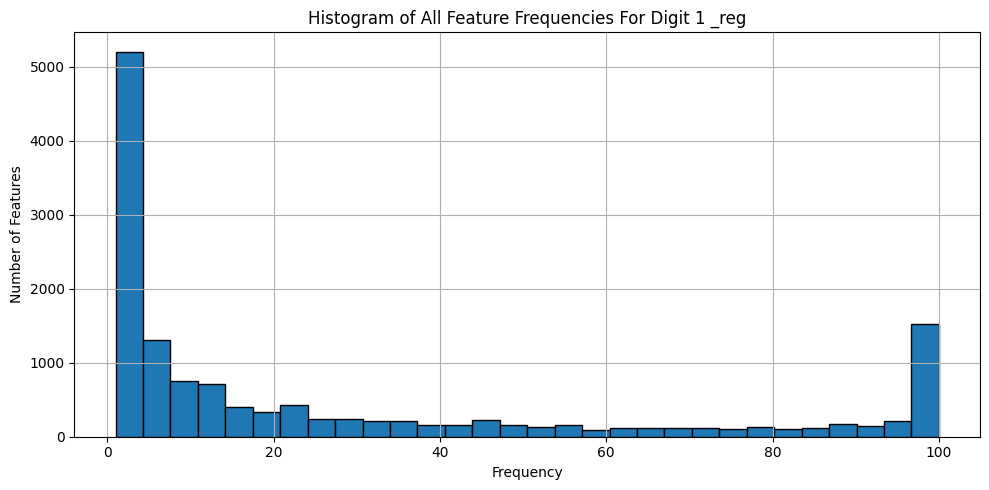

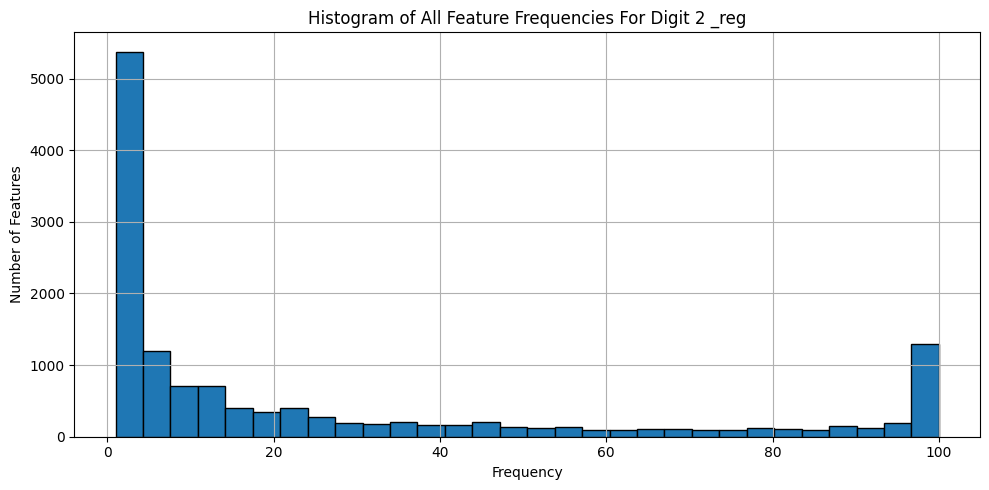

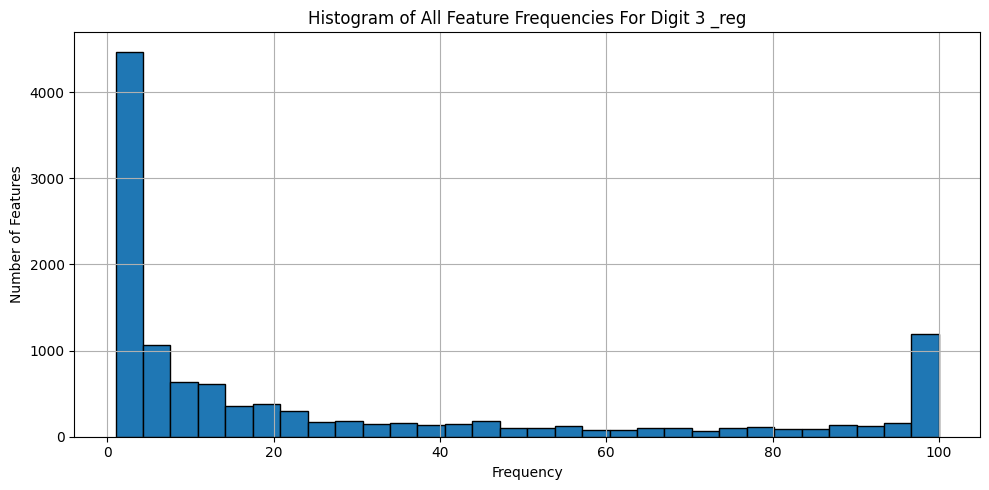

In [ ]:
plot_feature_frequencies(feature_counter)

## Part: 1.B - Finding the Circut by using interventions.

In this part are goal is to find a smaller subset of features - the circut.
To do so we will use interventions.

A question that may be raised is why to use interventions, instead of hust using the features collected form the attribution graphs. ( 1. get a smaller set, 2. the interventions reflect and prove that are choice is good)

In this part we will:

- create  batches - so each batch has same countefactual.
- for each batch
    - for each feature in the feature set:
        - query model with all prompts in batch (beforre intervaetion)
        - query model with counterfactual prompt and get the values of the acitvations for the speciifc feature
        - do intevention for the batch withe the activationof the countefactual prompt.
        - calculate effect for each promt in batch
- calcualte effect of each feature by averaging the effecct of the feature for all promts

### Part: 1.B.1 - Create Batches

In [ ]:
import random
import torch
import torch.nn.functional as F
from collections import defaultdict
from google.colab import drive
import pickle
import matplotlib.pyplot as plt
#drive.mount('/content/drive')
import os
#os.chdir("/content/drive/MyDrive/transformers_course")

### Part 1.B.2 : Generate a counterfactual prompt for the current batch

In [ ]:
# return prompt + result
def sample_counterfactual_prompt(prompts_and_results):
    # Step 1: Choose a result that does not appear in the existing prompt results
    results = set([r for _, r in prompts_and_results])
    # Create the set of all numbers from 0 to 198
    available_numbers = [101, 198]

    if not available_numbers:
        raise ValueError("No available numbers left to choose from.")
    counterfactual_result = random.choice(available_numbers)
    good = False
    while not good:
      # Step 2: Generate a prompt whose result is counterfactual_result
      num1 = random.randint(10, counterfactual_result - 10)
      mum2 = counterfactual_result - num1
      prompt = chattify(f"ANSWER ONLY WITH THE RESULT, NO SPACES. {num1:02d}+{mum2:02d}=")
      cot_prompt = f"provide a step-by-step calculation where each digit is added separately including any necessary carrying {num1:02d}+{mum2:02d}="
      is_ok, nc_prompt = check_prompt(prompt, cot_prompt, counterfactual_result)
      if is_ok:
        good = True

    if IS_COT:
      prompt = nc_prompt
    return prompt, counterfactual_result


### Part 1.B.3 : calcualte the effect of each feature

In [ ]:
BATCH_SIZE = 100
feature_to_effect = [defaultdict(float), defaultdict(float), defaultdict(float)]
dataset_size = len(prompts_and_results)

# Extract static feature set information
#features_with_pos = list(most_common_features)
#min_pos = min(pos for (_, pos, _) in features_with_pos)
#max_pos = max(pos for (_, pos, _) in features_with_pos)
#all_positions = list(range(min_pos, max_pos + 1))
#features = list(set((int(layer), int(feature_idx)) for (layer, _, feature_idx) in features_with_pos))[:10] #TODO DELETE 10

# Utility to compute effect metric
def effect_metric(P_r, P_rp, P_star_r, P_star_rp, eps=1e-6):
    term1 = (P_star_rp - P_rp) / (P_rp + eps)
    term2 = (P_r - P_star_r) / (P_star_r + eps)
    return 0.5 * (term1 + term2)


def calculate_effect_per_feature(prompts_and_results ,BATCH_SIZE ,model ,features, all_positions):
    # Batching loop
    for i in range(0, dataset_size, BATCH_SIZE):
        batch = prompts_and_results[i:i+BATCH_SIZE]
        prompts = [p for p, _ in batch]
        results = [r for _, r in batch]
        random.seed(22 + i)
        counterfactual,_ = sample_counterfactual_prompt(batch)

        # we will look for iructs for each token in the result, and the result is a number with 3 digits
        for digit_number in range(3):

          # Get probs
          with torch.inference_mode():
              # shape of p_logits is: (batch, seq length, vocab size)
              p_logits = model(prompts)
              p_prime_logits = model(counterfactual)
              p_probs = F.softmax(p_logits[:, -1, :], dim=-1)
              p_prime_probs = F.softmax(p_prime_logits[:, -1, :], dim=-1)
              _, p_acts = model.get_activations(prompts)
              _, p_prime_acts = model.get_activations(counterfactual)

          r_indices = torch.argmax(p_probs, dim=1)
          r_prime_indices = torch.argmax(p_prime_probs, dim=1)

          for i, (layer, feat_idx) in enumerate(features[digit_number]):
              patch = []
              for pos in all_positions[digit_number]:

                  value = p_prime_acts[layer, pos, feat_idx].item()
                  patch.append((layer, pos, feat_idx, value))

              patched_logits, _ = model.feature_intervention(prompts, patch)
              patched_probs = F.softmax(patched_logits[:, -1, :], dim=-1)

              for j in range(len(prompts)):
                  P_r = p_probs[j, r_indices[j]]
                  P_rp = p_probs[j, r_prime_indices[0]]
                  P_star_r = patched_probs[j, r_indices[j]]
                  P_star_rp = patched_probs[j, r_prime_indices[0]]

                  effect = effect_metric(P_r, P_rp, P_star_r, P_star_rp).item()
                  feature_to_effect[digit_number][(layer, feat_idx)] += effect
              print(f"Feature {i}, digit: {digit_number}: total effect = {feature_to_effect[digit_number][(layer, feat_idx)]:.4f}")

          # Get Next Digit and add to prompt
          next_token_ids = torch.argmax(p_probs, dim=-1)
          next_token_prime_ids = torch.argmax(p_prime_probs, dim=-1)
          prompts = [prompt + str(next_token_ids[i].item()) for i, prompt in enumerate(prompts)]
          counterfactual = counterfactual + str(next_token_prime_ids[0].item())

    # Normalize
    for digit in range(3):
      for feature in feature_to_effect[digit]:
          feature_to_effect[digit][feature] /= dataset_size
    return feature_to_effect


In [ ]:
def plot_effect_distribution(feature_to_effect):
    # Convert defaultdict values to a numeric array
    values = np.array(list(feature_to_effect.values()), dtype=float)

    # Create a figure with two subplots (stacked vertically)
    fig, axs = plt.subplots(2, 1, figsize=(10, 8), constrained_layout=True)

    # Histogram of effect values
    axs[0].hist(values, bins='auto', edgecolor='black')
    axs[0].set_title('Histogram of Effect Values')
    axs[0].set_xlabel('Effect')
    axs[0].set_ylabel('Frequency')
    axs[0].grid(True)

    # Line plot of effect values by index
    axs[1].plot(range(len(values)), values, marker='o')
    axs[1].set_title('Effect Value by Index')
    axs[1].set_xlabel('Index')
    axs[1].set_ylabel('Effect')
    axs[1].grid(True)

    # Display the plots
    plt.show()


In [ ]:
print(type(feature_to_effect), np.shape(feature_to_effect))

<class 'list'> (3,)


In [ ]:
def load_features(path):
    """Load features_to_effect dict from a file."""
    with open(path, 'rb') as f:
        return pickle.load(f)  # returns

# feature_to_effect = calculate_effect_per_feature(prompts_and_results ,BATCH_SIZE ,model ,features)
#feature_to_effect = load_features("features_to_their_effect_new.pkl")

def save_features(path, feature_to_effect):
    """Save trimmed_feature_dict and prompts_and_results to a file."""
    with open(path, 'wb') as f:
        pickle.dump(feature_to_effect, f)

In [ ]:
LOAD_FEATURES_TO_EFFECT = True
if LOAD_FEATURES_TO_EFFECT:
  feature_to_effect = load_features(f"/content/drive/MyDrive/features_to_their_effect_new_{file_extension}.pkl")
else:
  # Filter positions to be within the valid range [0, 25]
  filtered_all_positions = [[pos for pos in pos_list if 0 <= pos < model.cfg.n_layers] for pos_list in all_positions]
  feature_to_effect = calculate_effect_per_feature(prompts_and_results ,BATCH_SIZE ,model ,features, filtered_all_positions)
  save_features(f"/content/drive/MyDrive/features_to_their_effect_new_{file_extension}.pkl", feature_to_effect)

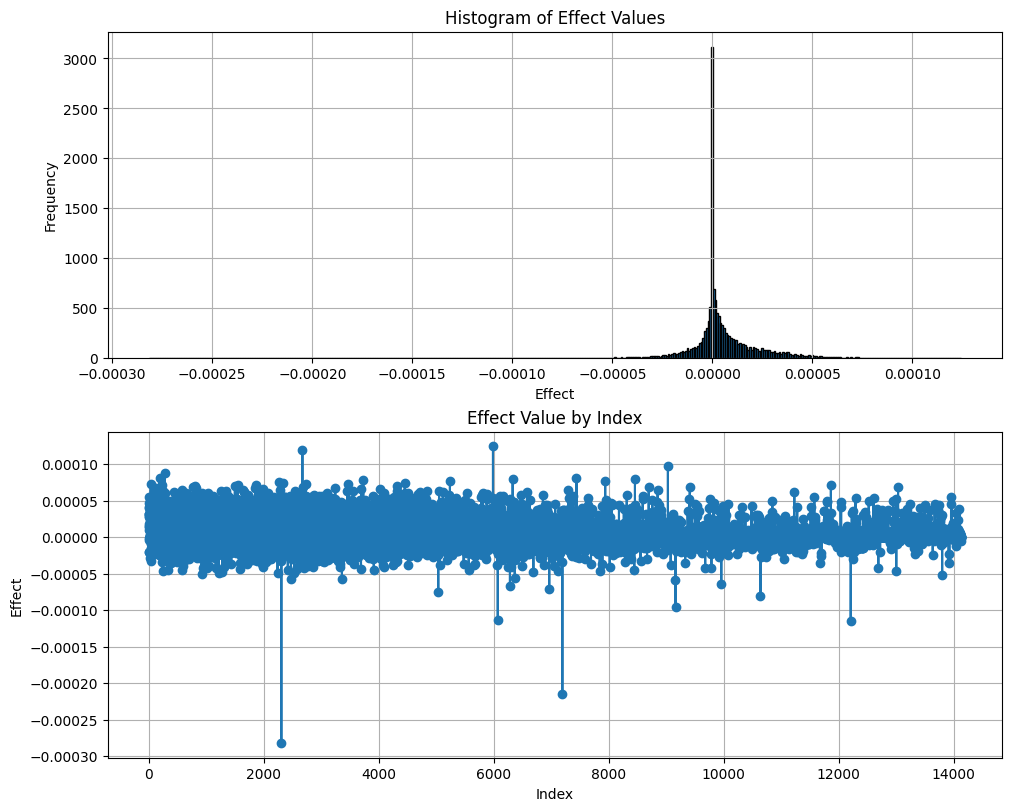

In [ ]:
plot_effect_distribution(feature_to_effect[0])

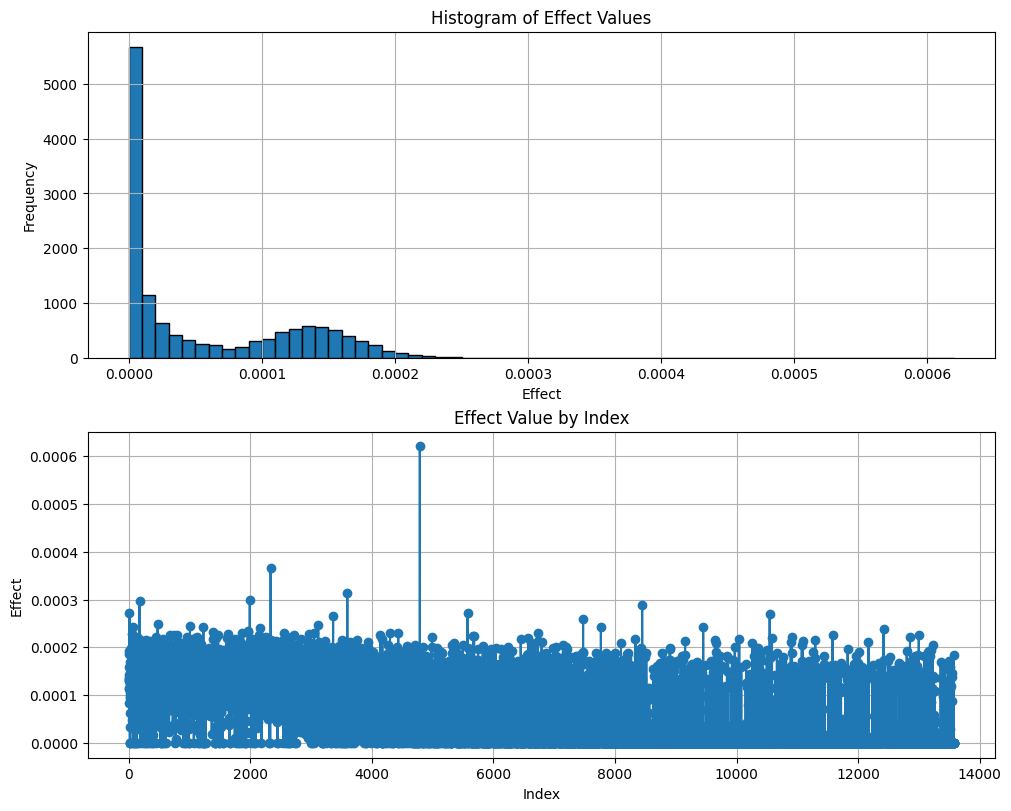

In [ ]:
plot_effect_distribution(feature_to_effect[1])

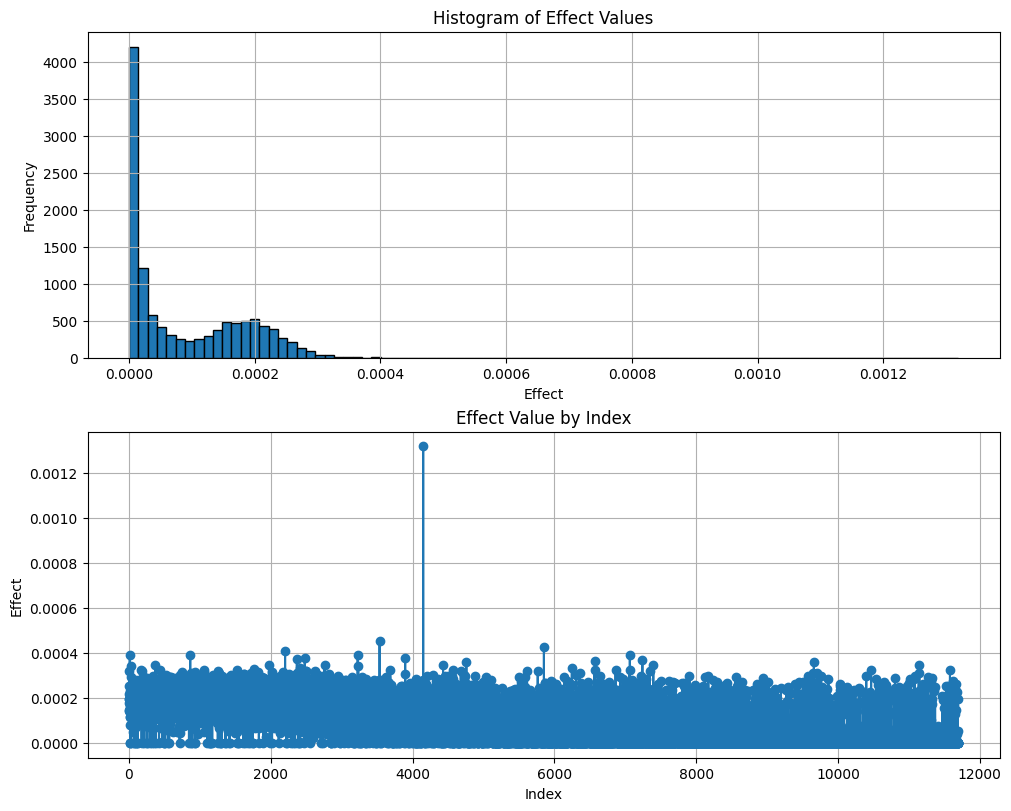

In [ ]:
plot_effect_distribution(feature_to_effect[2])

/content/drive/MyDrive/prompts_and_results.pk

/content/drive/MyDrive/feature_counter__reg.pkl

/content/drive/MyDrive/all_positions__reg.pkl


/content/drive/MyDrive/features__reg.pkl

/content/drive/MyDrive/features_to_their_effect_new_reg.pkl

### Part 1.B.4: Calculate the faithfulness score for each subgraph (top-k features)

In [ ]:
def generate_faithfulness_prompts(count=100, seed=1337):
    random.seed(seed)
    results = []
    cot_prompts = []

    while len(results) != count:
        result = random.randint(101, 197)
        max_num1 = result - 10
        num1 = random.randint(10, min(99, max_num1))
        num2 = result - num1

        # Ensure num1 is two-digit and num2 is three-digit to match expected length
        if num1 > 99 or num2 < 100:
            continue

        prompt = chattify(f"ANSWER ONLY WITH THE RESULT, NO SPACES. {num1:02d}+{num2:02d}=")

        cot_prompt = (
            f"provide a step-by-step calculation where each digit is added separately "
            f"including any necessary carrying {num1:02d}+{num2:02d}="
        )

        check, new_cot_prompt = check_prompt(prompt, cot_prompt, result)
        if check:
            results.append((prompt, result))
            cot_prompts.append((new_cot_prompt, result))

    return results, cot_prompts

In [ ]:
LOAD_FAITHFULNESS_PROMPTS = True

In [ ]:
FAITHFULNESS_PROMPTS_COUNT=100
SEED = 1337
if LOAD_FAITHFULNESS_PROMPTS:
  fe = "_cot" if IS_COT else ""
  with open(f"/content/drive/MyDrive/faithfulness_prompts_and_results{fe}.pk", 'rb') as f:
      faithfulness_prompts_and_results = pickle.load(f)[:FAITHFULNESS_PROMPTS_COUNT]
else:
  faithfulness_prompts_and_results_not_cot, faithfulness_cot_prompts_and_results = generate_faithfulness_prompts(FAITHFULNESS_PROMPTS_COUNT, SEED)
  with open("/content/drive/MyDrive/faithfulness_prompts_and_results.pk", 'wb') as f:
    pickle.dump((faithfulness_prompts_and_results_not_cot), f)

  with open("/content/drive/MyDrive/faithfulness_prompts_and_results_cot.pk", 'wb') as f:
      pickle.dump((faithfulness_cot_prompts_and_results), f)

# Calculate Faithufulness - (with TV and accuracy)

In [ ]:
from tqdm import tqdm


DIGITS = [0,1,2]
BATCH_SIZE = 100

fe = "_cot" if IS_COT else ""
TV_CACHE_PATH = f"/content/drive/MyDrive/tv_metrics{fe}.pkl"
LOAD_TV_FROM_DISK = False

In [ ]:
def get_mean_acts(prompts, batch_size=BATCH_SIZE):
    all_acts = []
    for i in tqdm(range(0, len(prompts), batch_size), desc="Building mean acts"):
        batch_prompts = prompts[i:i+batch_size]
        with torch.inference_mode():
            _, batch_acts = model.get_activations(batch_prompts)  # [layers, B, seq, feat]
        batch_acts = batch_acts.permute(1, 0, 2, 3)               # [B, layers, seq, feat]
        all_acts.append(batch_acts)
    return torch.cat(all_acts, dim=0).mean(0).contiguous()        # [layers, seq, feat]

def make_patch_except_circuit(circuit_features, max_seq_len, mean_acts):
    n_layer, seq_len, d_feat = mean_acts.shape
    actual_n_blocks = model.cfg.n_layers
    use_len = min(max_seq_len, seq_len)
    patch, keep = [], set(circuit_features) if circuit_features else set()
    total_entries = actual_n_blocks * use_len * d_feat
    with tqdm(total=total_entries, desc="Building patch", leave=False) as pbar:
        for layer in range(actual_n_blocks):
            for pos in range(use_len):
                for feat in range(d_feat):
                    if (layer, feat) not in keep:
                        patch.append((layer, pos, feat, mean_acts[layer, pos, feat].item()))
                    pbar.update(1)
    return patch

def get_circuit_patch_optimized(base_patch, circuit_features):
    keep = set(circuit_features) if circuit_features else set()
    if not keep:
        return base_patch
    return [(l, p, f, v) for (l, p, f, v) in base_patch if (l, f) not in keep]

def eval_last_token_probs(prompts, patch=None, batch_size=BATCH_SIZE):
    probs_chunks = []
    with torch.inference_mode():
        for i in tqdm(range(0, len(prompts), batch_size),
                      desc="Eval probs (no patch)" if patch is None else "Eval probs (with patch)"):
            sub_prompts = prompts[i:i+batch_size]
            if patch is None:
                logits = model(sub_prompts)
            else:
                logits, _ = model.feature_intervention(sub_prompts, patch)
            last_logits = logits[:, -1, :]  # [B, V]
            probs_chunks.append(torch.softmax(last_logits, dim=-1))
    return torch.cat(probs_chunks, dim=0)  # [N, V]

def build_correct_next_token_ids(digit, pairs):
    # pairs: list[(prompt_str, result_int)]
    ids = []
    for p, r in pairs:
        s = str(r)
        next_char = s[digit] if digit < len(s) else ""  # defensive
        toks = model.tokenizer.encode(next_char)
        ids.append(toks[0] if len(toks) > 0 else -1)    # -1 will never match
    return torch.tensor(ids, dtype=torch.long, device="cuda" if torch.cuda.is_available() else "cpu")

def topk_accuracy_from_probs(probs, gold_ids, k):
    # probs: [N,V], gold_ids: [N]
    topk = torch.topk(probs, k=k, dim=-1).indices  # [N,k]
    if k == 1:
        return (topk.squeeze(-1) == gold_ids).float().mean().item()
    match = (topk == gold_ids.unsqueeze(-1))       # [N,k]
    return match.any(dim=-1).float().mean().item()

def plot_series(x, ys, labels, title):
    plt.figure(figsize=(10, 6))
    for y, lab in zip(ys, labels):
        plt.plot(x, y, marker='o', linewidth=2, markersize=4, label=lab)
    plt.xlabel("Number of features in circuit (k)")
    plt.grid(True, alpha=0.3); plt.axhline(y=0, linestyle='--', alpha=0.3)
    plt.title(title + (" - COT" if IS_COT else ""))
    plt.legend()
    plt.tight_layout()
    plt.show()

In [ ]:
def build_correct_next_token_ids(digit, pairs, prompts):
    """
    Build gold next-token IDs by tokenizing the *contextualized* string:
      correct_id_i = tokenizer.encode(prompts[i] + next_char)[-1]
    This handles tokenizers that add/merge spaces with digits.
    """
    ids = []
    for i, (p, r) in enumerate(pairs):
        s = str(r)
        # We have already revealed s[:digit] in `prompts`; the next correct char is s[digit]
        if digit < len(s):
            next_char = s[digit]
            full = prompts[i] + next_char
            tok_ids = model.tokenizer.encode(full)
            ids.append(tok_ids[-1] if len(tok_ids) > 0 else -1)
        else:
            ids.append(-1)  # no next char (defensive)
    device = "cuda" if torch.cuda.is_available() else "cpu"
    return torch.tensor(ids, dtype=torch.long, device=device)

def compute_metrics_for_digit(digit, new_prompts, feature_to_effect):
    torch.cuda.empty_cache()
    prompts = [p + str(r)[:digit] for p, r in new_prompts]
    mean_acts = get_mean_acts(prompts)
    max_len = max(len(model.tokenizer.encode(p)) for p in prompts)

    sorted_feats = sorted(
        feature_to_effect[digit],
        key=lambda k: abs(feature_to_effect[digit][k]),
        reverse=True
    )
    baseline_probs = eval_last_token_probs(prompts, patch=None, batch_size=BATCH_SIZE)

    total_feats = len(sorted_feats)
    k_values = [max(1, int(total_feats * i / 10)) for i in range(1, 11)]

    empty_patch = make_patch_except_circuit(None, max_len, mean_acts)

    # ↓↓↓ only change here: pass `prompts` to build IDs in-context
    gold_ids = build_correct_next_token_ids(digit, new_prompts, prompts)
    if gold_ids.device != baseline_probs.device:
        gold_ids = gold_ids.to(baseline_probs.device)

    tv_scores, acc1_scores, acc3_scores = [], [], []
    for k in tqdm(k_values, desc=f"Digit {digit}: metrics over k"):
        keep = set(sorted_feats[:k])
        circuit_patch = get_circuit_patch_optimized(empty_patch, keep)
        probs_abl = eval_last_token_probs(prompts, patch=circuit_patch, batch_size=BATCH_SIZE)

        tv_per_prompt = 0.5 * torch.sum(torch.abs(probs_abl - baseline_probs), dim=-1)
        tv_scores.append(tv_per_prompt.mean().item())

        acc1_scores.append(topk_accuracy_from_probs(probs_abl, gold_ids, k=1))
        acc3_scores.append(topk_accuracy_from_probs(probs_abl, gold_ids, k=3))

    return k_values, tv_scores, acc1_scores, acc3_scores

In [ ]:
# Load / compute / save

k_values_all, tv_all, acc1_all, acc3_all = [], [], [], []

loaded_ok = False
if LOAD_TV_FROM_DISK and os.path.exists(TV_CACHE_PATH):
    try:
        with open(TV_CACHE_PATH, 'rb') as f:
            data = pickle.load(f)
        if data.get("is_cot") == IS_COT and data.get("digits") == DIGITS:
            k_values_all = data["k_values_all"]
            tv_all      = data["tv_all"]
            acc1_all    = data["acc1_all"]
            acc3_all    = data["acc3_all"]
            loaded_ok = True
            print(f"Loaded cached metrics from {TV_CACHE_PATH}.")
        else:
            print("Cache mismatch; recomputing.")
    except Exception as e:
        print(f"Failed to load cache ({e}); recomputing...")

if not loaded_ok:
    for digit in DIGITS:
        kv, tv, a1, a3 = compute_metrics_for_digit(digit, faithfulness_prompts_and_results, feature_to_effect)
        k_values_all.append(kv)
        tv_all.append(tv)
        acc1_all.append(a1)
        acc3_all.append(a3)
    try:
        with open(TV_CACHE_PATH, 'wb') as f:
            pickle.dump({
                "is_cot": IS_COT,
                "digits": DIGITS,
                "k_values_all": k_values_all,
                "tv_all": tv_all,
                "acc1_all": acc1_all,
                "acc3_all": acc3_all,
            }, f)
        print(f"Saved metrics to {TV_CACHE_PATH}.")
    except Exception as e:
        print(f"Warning: failed to save metrics ({e}).")

Digit 2: metrics over k: 100%|██████████| 10/10 [29:22<00:00, 176.28s/it]


Saved metrics to /content/drive/MyDrive/tv_metrics.pkl.


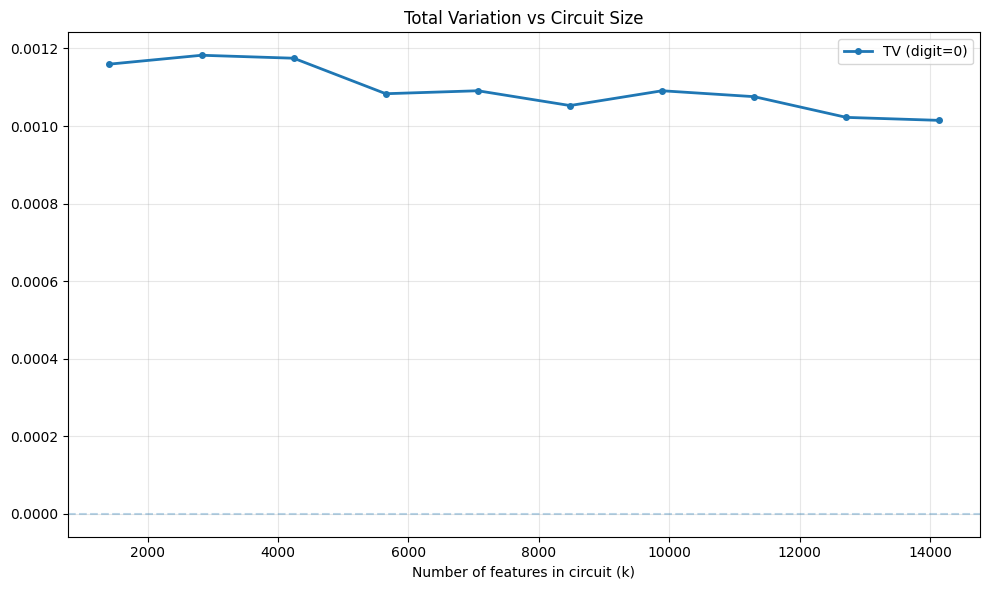

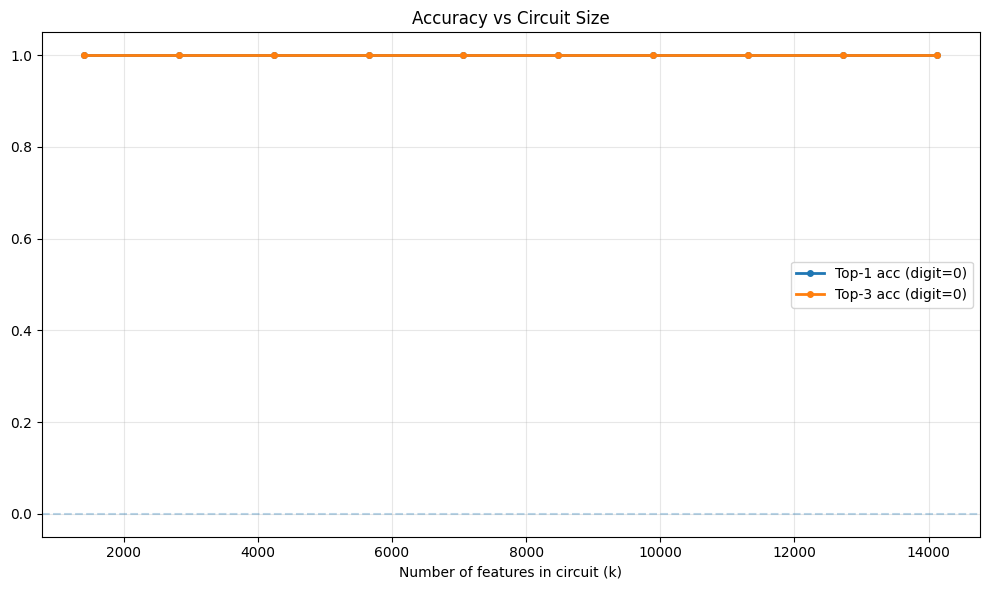

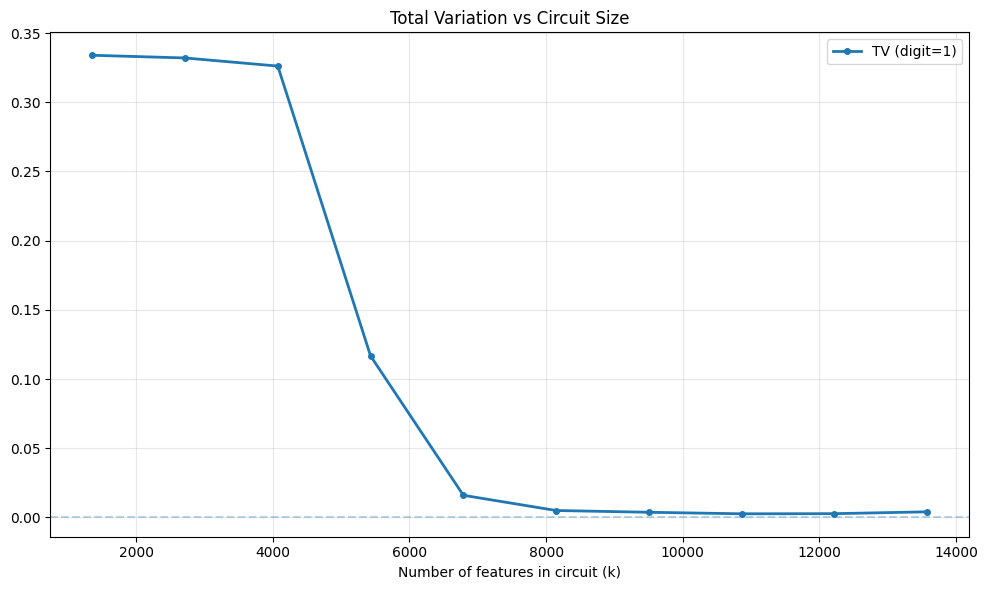

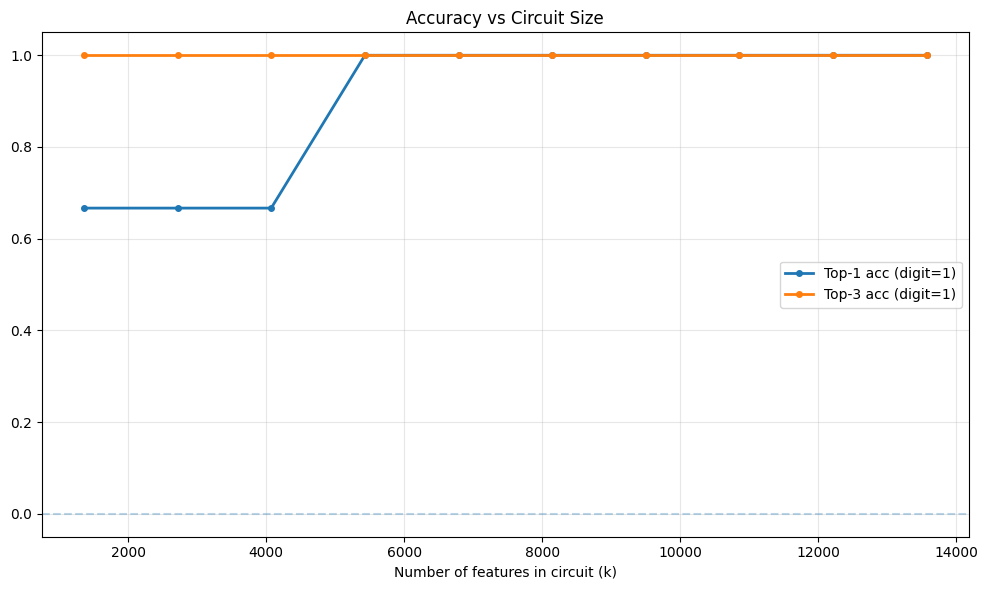

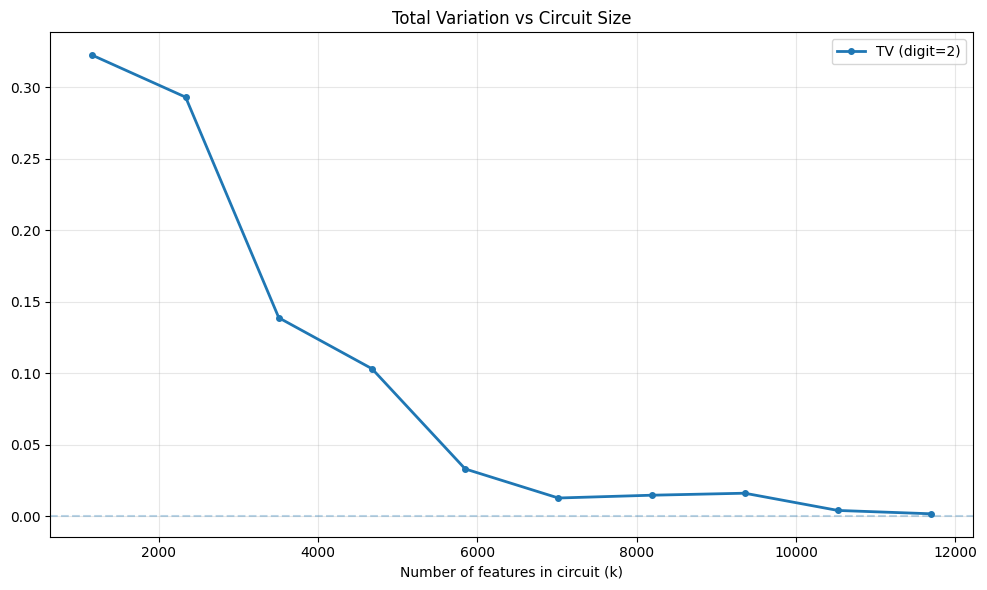

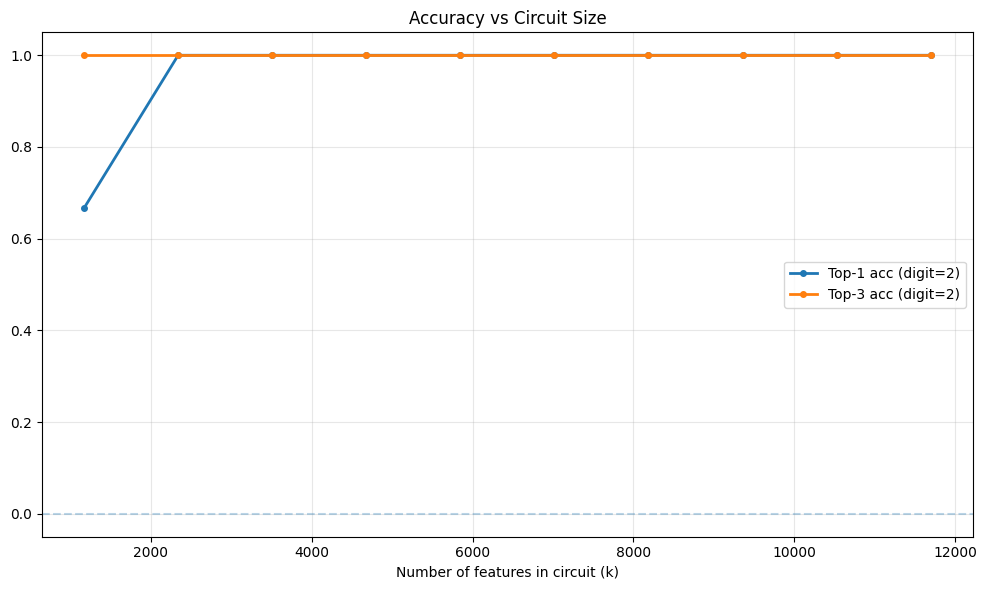

In [ ]:
# Plots (TV, Top-1, Top-3) per digit

for idx, digit in enumerate(DIGITS):
    plot_series(
        k_values_all[idx],
        [tv_all[idx]],
        [f"TV (digit={digit})"],
        title="Total Variation vs Circuit Size"
    )
    plot_series(
        k_values_all[idx],
        [acc1_all[idx], acc3_all[idx]],
        [f"Top-1 acc (digit={digit})", f"Top-3 acc (digit={digit})"],
        title="Accuracy vs Circuit Size"
    )